In [1]:
import geopandas
import math

In [2]:
az = geopandas.read_file('raw_data/Arizona/cb_2020_04_tract_500k.shp')
tx = geopandas.read_file('raw_data/Texas/cb_2020_48_tract_500k.shp')
ut = geopandas.read_file('raw_data/Utah/cb_2020_49_tract_500k.shp')
tx2 = geopandas.read_file('raw_data/Not_Texas/cb_2020_48_sldu_500k.shp')

In [3]:
##az.plot()
##tx.plot()
##ut.plot()

In [4]:
display(tx2)

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry
0,48,007,610U600US48007,48007,7,State Senate District 7,TX,Texas,LU,2018,924461058,7441750,"POLYGON ((-95.78235 30.02745, -95.78158 30.027..."
1,48,016,610U600US48016,48016,16,State Senate District 16,TX,Texas,LU,2018,625296466,18563840,"POLYGON ((-97.03384 32.83853, -97.03358 32.852..."
2,48,013,610U600US48013,48013,13,State Senate District 13,TX,Texas,LU,2018,543608220,4554332,"POLYGON ((-95.61470 29.71341, -95.60467 29.714..."
3,48,011,610U600US48011,48011,11,State Senate District 11,TX,Texas,LU,2018,2983983804,1055090498,"MULTIPOLYGON (((-94.82326 29.32392, -94.82279 ..."
4,48,028,610U600US48028,48028,28,State Senate District 28,TX,Texas,LU,2018,125489990335,649029316,"POLYGON ((-103.61089 31.65180, -103.37029 31.6..."
5,48,006,610U600US48006,48006,6,State Senate District 6,TX,Texas,LU,2018,682364150,58190489,"MULTIPOLYGON (((-94.97839 29.68365, -94.97743 ..."
6,48,026,610U600US48026,48026,26,State Senate District 26,TX,Texas,LU,2018,477405321,2048799,"POLYGON ((-98.71066 29.48182, -98.70984 29.483..."
7,48,014,610U600US48014,48014,14,State Senate District 14,TX,Texas,LU,2018,3957667402,69559237,"POLYGON ((-98.12313 30.48704, -98.11687 30.498..."
8,48,027,610U600US48027,48027,27,State Senate District 27,TX,Texas,LU,2018,11024240313,3322819117,"MULTIPOLYGON (((-97.25287 26.37530, -97.25050 ..."
9,48,017,610U600US48017,48017,17,State Senate District 17,TX,Texas,LU,2018,2903514390,326680982,"POLYGON ((-95.87249 29.50659, -95.87030 29.508..."


<AxesSubplot: >

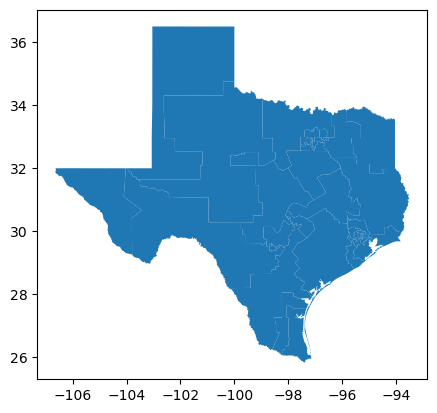

In [5]:
tx2.plot()

In [6]:
az['countyNum'] = az['COUNTYFP']
tx['countyNum'] = tx['COUNTYFP']
ut['countyNum'] = ut['COUNTYFP']

az = az.dissolve(by = 'COUNTYFP')
tx = tx.dissolve(by = 'COUNTYFP')
ut = ut.dissolve(by = 'COUNTYFP')
##display(az)

In [7]:
azSMD = az.copy()
txSMD = tx2.copy()
utSMD = ut.copy()

azMMD = az.copy()
txMMD = tx2.copy()
utMMD = ut.copy()
display(tx2)

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry
0,48,007,610U600US48007,48007,7,State Senate District 7,TX,Texas,LU,2018,924461058,7441750,"POLYGON ((-95.78235 30.02745, -95.78158 30.027..."
1,48,016,610U600US48016,48016,16,State Senate District 16,TX,Texas,LU,2018,625296466,18563840,"POLYGON ((-97.03384 32.83853, -97.03358 32.852..."
2,48,013,610U600US48013,48013,13,State Senate District 13,TX,Texas,LU,2018,543608220,4554332,"POLYGON ((-95.61470 29.71341, -95.60467 29.714..."
3,48,011,610U600US48011,48011,11,State Senate District 11,TX,Texas,LU,2018,2983983804,1055090498,"MULTIPOLYGON (((-94.82326 29.32392, -94.82279 ..."
4,48,028,610U600US48028,48028,28,State Senate District 28,TX,Texas,LU,2018,125489990335,649029316,"POLYGON ((-103.61089 31.65180, -103.37029 31.6..."
5,48,006,610U600US48006,48006,6,State Senate District 6,TX,Texas,LU,2018,682364150,58190489,"MULTIPOLYGON (((-94.97839 29.68365, -94.97743 ..."
6,48,026,610U600US48026,48026,26,State Senate District 26,TX,Texas,LU,2018,477405321,2048799,"POLYGON ((-98.71066 29.48182, -98.70984 29.483..."
7,48,014,610U600US48014,48014,14,State Senate District 14,TX,Texas,LU,2018,3957667402,69559237,"POLYGON ((-98.12313 30.48704, -98.11687 30.498..."
8,48,027,610U600US48027,48027,27,State Senate District 27,TX,Texas,LU,2018,11024240313,3322819117,"MULTIPOLYGON (((-97.25287 26.37530, -97.25050 ..."
9,48,017,610U600US48017,48017,17,State Senate District 17,TX,Texas,LU,2018,2903514390,326680982,"POLYGON ((-95.87249 29.50659, -95.87030 29.508..."


In [8]:
def azSmdDistricting(countyNum):
    num = int(countyNum)
    if(num in {15,5}):
        return 1
    if(num in {25}):
        return 2
    if(num in {1, 17}):
        return 3
    if(num in {11,9}):
        return 4
    if(num in {19,23}):
        return 5
    if(num in {21}):
        return 6
    if(num in {13,7}):
        return 7
    if(num in {27,12}):
        return 8
    if(num in {3}):
        return 9
    
    
    return 9

In [9]:
def azMmdDistricting(countyNum):
    num = int(countyNum)
    if(num in {15,25,5,17,1}):
        return 1
    if(num in {12,27,13}):
        return 2
    if(num in {7,21,9,11,3,19,23}):
        return 3
    
    
    return 3

In [10]:
def utSmdDistricting(countyNum):
    num = int(countyNum)
    if(num in {37,25,53,21,17,}):
        return 1
    if(num in {55,31,1,41,27,39,23}):
        return 2
    if(num in {15,19,7,47,13,9}):
        return 3
    if(num in {3,5,33,57,11,29,43}):
        return 4
    
    
    return 4

In [11]:
def utMmdDistricting(countyNum):
    return 1

In [12]:
def txSmdDistricting(countyNum):
    num = int(countyNum)
    return num

In [13]:
def txMmdDistricting(countyNum):
    num = int(countyNum)
    if(num in {32,28,31}):
        return 1
    if(num in {29,19,26}):
        return 2
    if(num in {24,30,25}):
        return 3
    if(num in {21,20,27,18,7,5,14}):
        return 4
    if(num in {17,13,15,11,6}):
        return 5
    if(num in {24,22,23}):
        return 6
    if(num in {10,12,16,8,2,12,9}):
        return 7
    if(num in {1,3}):
        return 8
    return num

In [14]:
azSMD['district'] = az['countyNum'].apply(azSmdDistricting)
azMMD['district'] = az['countyNum'].apply(azMmdDistricting)
utSMD['district'] = ut['countyNum'].apply(utSmdDistricting)
utMMD['district'] = ut['countyNum'].apply(utMmdDistricting)

txSMD['district'] = txSMD['NAME']
txMMD['district'] = txMMD['NAME'].apply(txMmdDistricting)
txMMD

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry,district
0,48,007,610U600US48007,48007,7,State Senate District 7,TX,Texas,LU,2018,924461058,7441750,"POLYGON ((-95.78235 30.02745, -95.78158 30.027...",4
1,48,016,610U600US48016,48016,16,State Senate District 16,TX,Texas,LU,2018,625296466,18563840,"POLYGON ((-97.03384 32.83853, -97.03358 32.852...",7
2,48,013,610U600US48013,48013,13,State Senate District 13,TX,Texas,LU,2018,543608220,4554332,"POLYGON ((-95.61470 29.71341, -95.60467 29.714...",5
3,48,011,610U600US48011,48011,11,State Senate District 11,TX,Texas,LU,2018,2983983804,1055090498,"MULTIPOLYGON (((-94.82326 29.32392, -94.82279 ...",5
4,48,028,610U600US48028,48028,28,State Senate District 28,TX,Texas,LU,2018,125489990335,649029316,"POLYGON ((-103.61089 31.65180, -103.37029 31.6...",1
5,48,006,610U600US48006,48006,6,State Senate District 6,TX,Texas,LU,2018,682364150,58190489,"MULTIPOLYGON (((-94.97839 29.68365, -94.97743 ...",5
6,48,026,610U600US48026,48026,26,State Senate District 26,TX,Texas,LU,2018,477405321,2048799,"POLYGON ((-98.71066 29.48182, -98.70984 29.483...",2
7,48,014,610U600US48014,48014,14,State Senate District 14,TX,Texas,LU,2018,3957667402,69559237,"POLYGON ((-98.12313 30.48704, -98.11687 30.498...",4
8,48,027,610U600US48027,48027,27,State Senate District 27,TX,Texas,LU,2018,11024240313,3322819117,"MULTIPOLYGON (((-97.25287 26.37530, -97.25050 ...",4
9,48,017,610U600US48017,48017,17,State Senate District 17,TX,Texas,LU,2018,2903514390,326680982,"POLYGON ((-95.87249 29.50659, -95.87030 29.508...",5


In [15]:
azSMD = azSMD.dissolve(by = 'district')
azMMD = azMMD.dissolve(by = 'district')
utSMD = utSMD.dissolve(by = 'district')
utMMD = utMMD.dissolve(by = 'district')
txMMD = txMMD.dissolve(by = 'district')
display(txMMD)

,geometry,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER
district,,,,,,,,,,,,,
1,"POLYGON ((-100.00038 34.69627, -100.00038 34.6...",48,028,610U600US48028,48028,28,State Senate District 28,TX,Texas,LU,2018,125489990335,649029316
2,"POLYGON ((-98.58782 29.59176, -98.58758 29.590...",48,026,610U600US48026,48026,26,State Senate District 26,TX,Texas,LU,2018,477405321,2048799
3,"POLYGON ((-97.86064 30.23530, -97.86478 30.234...",48,030,610U600US48030,48030,30,State Senate District 30,TX,Texas,LU,2018,31078332351,749658335
4,"MULTIPOLYGON (((-97.26619 26.54036, -97.25870 ...",48,007,610U600US48007,48007,7,State Senate District 7,TX,Texas,LU,2018,924461058,7441750
5,"MULTIPOLYGON (((-95.86339 29.51492, -95.85913 ...",48,013,610U600US48013,48013,13,State Senate District 13,TX,Texas,LU,2018,543608220,4554332
6,"POLYGON ((-98.06684 32.55882, -98.01829 32.558...",48,023,610U600US48023,48023,23,State Senate District 23,TX,Texas,LU,2018,944902931,37556466
7,"POLYGON ((-97.55037 32.58032, -97.55029 32.600...",48,016,610U600US48016,48016,16,State Senate District 16,TX,Texas,LU,2018,625296466,18563840
8,"POLYGON ((-96.45308 32.35285, -96.45053 32.350...",48,003,610U600US48003,48003,3,State Senate District 3,TX,Texas,LU,2018,40389916437,1736872249


<AxesSubplot: >

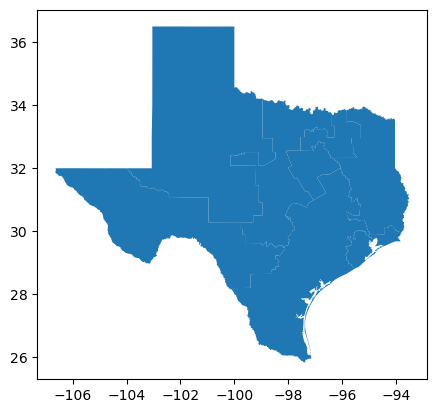

In [16]:
##az.to_file("gui_review/az.json", driver='GeoJSON')
##tx.to_file("gui_review/tx.json", driver='GeoJSON')
##ut.to_file("gui_review/ut.json", driver='GeoJSON')
txMMD.plot()

In [17]:
azSMD.to_file("gui_review/azs.json", driver='GeoJSON')
txSMD.to_file("gui_review/txs.json", driver='GeoJSON')
utSMD.to_file("gui_review/uts.json", driver='GeoJSON')

azMMD.to_file("gui_review/azm.json", driver='GeoJSON')
txMMD.to_file("gui_review/txm.json", driver='GeoJSON')
utMMD.to_file("gui_review/utm.json", driver='GeoJSON')